<center> <h1> Machine Learning Assignment</h1> </center>
<center> <h1> Adult Census Income Prediction using Scikit-Learn </h1> </center>
<center> <h1> (Step-wise Tutorial)</h1> </center>
<br><br><br>
<center> <h1> Instructor: Dr. Rao Muhammad Adeel Nawab </h1></center>

**Overview**<br>
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year. <br><br>
**Machine Learning Approach:** <br>The problem of Adult Census Income Prediction is treated as a supervised learning approach because we going to use the labelled dataset.<br><br> **The Input and Output are:**<br>
<b> - Input:</b> Set of Attributes (age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week)<br><br>
<b> - Output:</b> Income <br><br>
<b> - Goal:</b> Learn from Input to predict Output<br><br>
    
<h3> Three Phases of Machine Learning: </h3><br><br>
<b>1. Training Phase </b>– Learn from Training Dataset.<br><br>
<b>2. Testing/Validation/Evaluation Phase</b> – Evaluate how well the algorithm learned.<br><br>
<b>3. Application Phase</b>– Use your learned/trained models in real world application.<br><br>


<center><h1> Table of Contents </h1></center>
<h2>PHASE 1 & 2: TRAINING AND TESTING </h2>

**Step 1:** Import Libraries<br><br>
**Step 2:** Read, Understand and Pre-process Train/Test Data<br><br>
**Step 2.1:** Read Data<br><br>
**Step 2.2:** Understand Data<br><br>
**Step 2.3:** Pre-process Data<br><br>
**Step 3:** Label Encoding for Train/Test Data<br><br>
**Step 4:** Feature Extraction – Changing Representation of features “from String to Feature-Vector”<br><br>
**Step 5:** Train Machine Learning Algorithms using Training Data<br><br>
**Step 6:** Evaluate Machine Learning Algorithms using Test Data<br><br>
**Step 7:** Selection of Best Model<br><br><br><br>


<h2> PHASE 3: APPLICATION PHASE</h2><br>
**Step 8:** Application Phase<br><br>
**Step 8.1:** Combine Dataset (Train + Test )¶<br><br>
**Step 8.2:** Train Best Model (see Step 7) on all data(Train+Test)<br><br>
**Step 8.3:** Save the Trained Model in Pickle File<br><br>

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')    

from astropy.table import Table, Column 


# Step 2: Read, Understand & Pre-process Train Data

In [2]:
train_dataset=pd.read_csv('adult.csv')
a="Train Dataset:"
print(a)
print('='*len(a)+"\n")
print(train_dataset)
print("\n\n")
b="Attributes Names in Train Dataset:"
print(b)
print('='*len(b)+"\n")
print(train_dataset.columns)
print("\n\n")
c="Number of instances in Train Dataset:"
print(c)
print('='*len(c)+"\n")
print("Train Data instances: ",train_dataset.shape[0])

Train Dataset:

       age         workclass  fnlwgt     education  education.num  \
0       90                 ?   77053       HS-grad              9   
1       82           Private  132870       HS-grad              9   
2       66                 ?  186061  Some-college             10   
3       54           Private  140359       7th-8th              4   
4       41           Private  264663  Some-college             10   
5       34           Private  216864       HS-grad              9   
6       38           Private  150601          10th              6   
7       74         State-gov   88638     Doctorate             16   
8       68       Federal-gov  422013       HS-grad              9   
9       41           Private   70037  Some-college             10   
10      45           Private  172274     Doctorate             16   
11      38  Self-emp-not-inc  164526   Prof-school             15   
12      52           Private  129177     Bachelors             13   
13      32        

In [3]:
train_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
train_dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train_dataset['income']=train_dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
train_dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


### Understanding Data via Graphs

Income Count in Train Dataset:
0    24720
1     7841
Name: income, dtype: int64


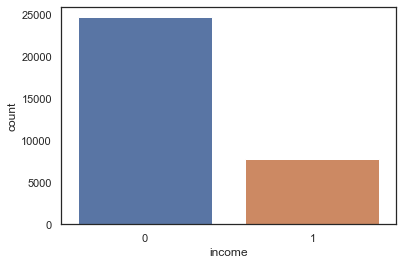

In [7]:
import matplotlib.pyplot as plt
a="Income Count in Train Dataset:"
print(a)
print('='*len(a))
sns.countplot(train_dataset['income'],label="Count")
print(train_dataset['income'].value_counts())


In [8]:
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

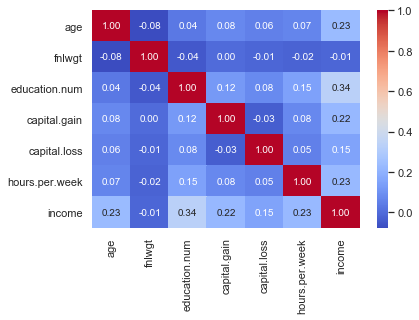

In [9]:
#Correlation
g = sns.heatmap(train_dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


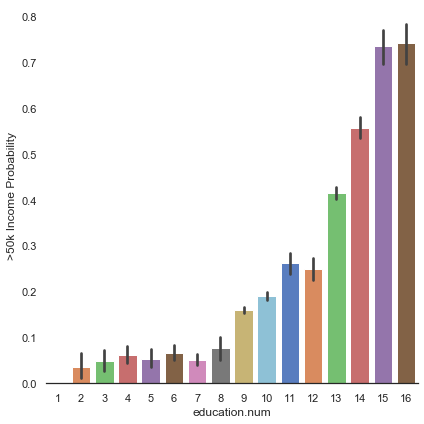

In [10]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=train_dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50k Income Probability")

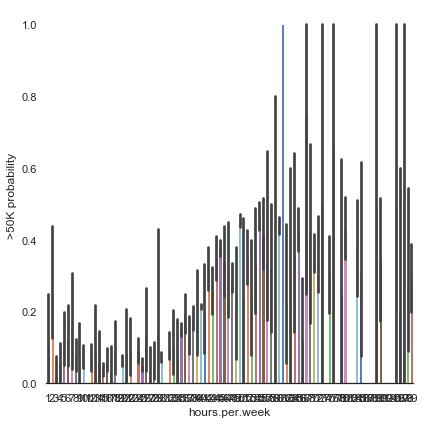

In [11]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=train_dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

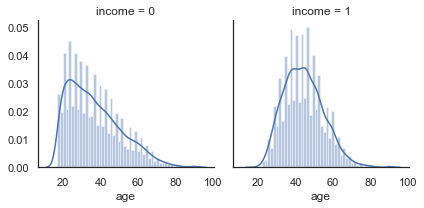

In [12]:
# Explore Age vs Income
g = sns.FacetGrid(train_dataset, col='income')
g = g.map(sns.distplot, "age")

### Step 2.3: Pre-Process Data

In [13]:
a="Train data before pre-processing:"
b='='*(len(a)+10)
print(a)
print(b)
print('\n')
print(train_dataset.head(3))
c="Train data after pre-processing:"
print('\n')
print(c)
print(b)
print('\n')
train_dataset_preprocessed=train_dataset
train_dataset_preprocessed["workclass"] = train_dataset["workclass"].fillna("X")
train_dataset_preprocessed["occupation"] = train_dataset["occupation"].fillna("X")
train_dataset_preprocessed["native.country"] = train_dataset["native.country"].fillna("United-States")
print(train_dataset_preprocessed)

Train data before pre-processing:


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2                ?      Unmarried  Black  Female             0          4356   

   hours.per.week native.country  income  
0              40  United-States       0  
1              18  United-States       0  
2              40  United-States       0  


Train data after pre-processing:


       age         workclass  fnlwgt     education  education.num  \
0       90                 ?   77053       HS-grad              9   
1      

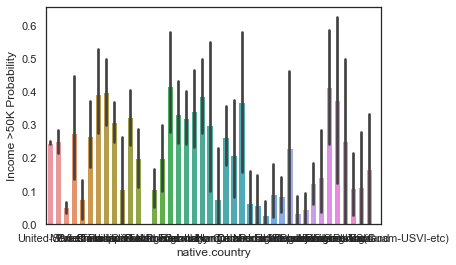

In [14]:
g = sns.barplot(x="native.country",y="income",data=train_dataset_preprocessed)
g = g.set_ylabel("Income >50K Probability")

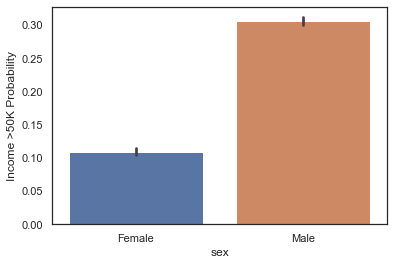

In [15]:
g = sns.barplot(x="sex",y="income",data=train_dataset_preprocessed)
g = g.set_ylabel("Income >50K Probability")

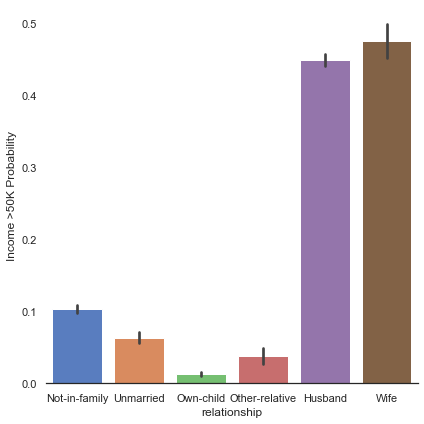

In [16]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=train_dataset_preprocessed,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

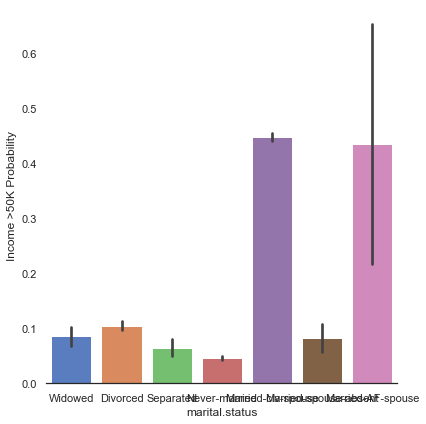

In [17]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income",data=train_dataset_preprocessed,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

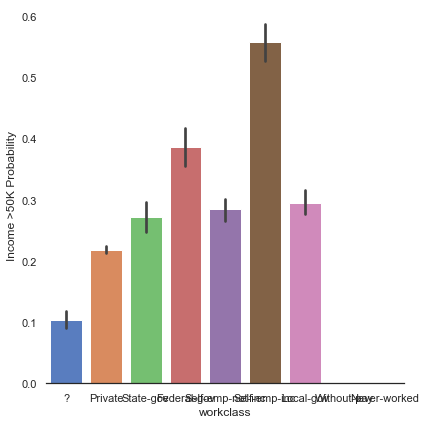

In [18]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=train_dataset_preprocessed,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

# Step 3: Label Encoding for Test/Train Data

#### Label encoding train dataset

In [19]:
train_dataset_preprocessed["sex"] = train_dataset_preprocessed["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
train_dataset_preprocessed["marital.status"] = train_dataset_preprocessed["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
train_dataset_preprocessed["marital.status"] = train_dataset_preprocessed["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_dataset_preprocessed["marital.status"] = train_dataset_preprocessed["marital.status"].map({"Married":1, "Single":0})
train_dataset_preprocessed["marital.status"] = train_dataset_preprocessed["marital.status"].astype(int)

# Drop the data you don't want to use
train_dataset_preprocessed.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(train_dataset_preprocessed.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9               0    1             0   
1   82  132870              9               0    1             0   
2   66  186061             10               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   

   capital.loss  hours.per.week  income  
0          4356              40       0  
1          4356              18       0  
2          4356              40       0  
3          3900              40       0  
4          3900              40       0  


# Step 4: Feature Extraction – Changing Representation of Data “from String to Vector”

In [20]:
array = train_dataset_preprocessed.values
#print(array)
X = array[:,0:8] # all input data
Y = array[:,8] # output Data i.e, Income
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train,X_test,y_train,y_test= train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3


Split Data: X
[[    90  77053      9 ...      0   4356     40]
 [    82 132870      9 ...      0   4356     18]
 [    66 186061     10 ...      0   4356     40]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]]
Split Data: Y
[0 0 0 ... 1 0 0]


# Step 5: Train Machine Learning Algorithms using Training Data

In [21]:
from sklearn.metrics import accuracy_score
log=LogisticRegression()
log.fit(X_train,y_train)
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')

print(log)

Parameters and their values:


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_classifier=RandomForestClassifier()
# Fitting train data in Random Forest.
rand_forest_classifier.fit(X_train,y_train)

#print(y_predictions_randmforest)
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
print(rand_forest_classifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Parameters and their values:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [23]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(X_train,y_train)
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
print(svc)

Parameters and their values:


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb=BernoulliNB()
a="Parameters and their values:"
bernoulli_nb.fit(X_train,y_train)
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
print(bernoulli_nb)

Parameters and their values:


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


In [25]:
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
print(lda)

Parameters and their values:


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [26]:
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn)

Parameters and their values:


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [27]:
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print(dtc)

Parameters and their values:


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [28]:
a="Parameters and their values:"
b='='*(len(a)+20)
print(a)
print(b)
print('\n')
gnb=GaussianNB()
gnb.fit(X_train,y_train)
print(gnb)

Parameters and their values:


GaussianNB(priors=None, var_smoothing=1e-09)


# Step 6: Evaluate Machine Learning Algorithms using Test Data

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y_pred=log.predict(X_test)
print('\n')
print('Accuracy score:')
b='='*(20)
print(b)
listofmodels=[]
dic=["Logistic Regression",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print(accuracy_score(y_test,y_pred)*100)



Accuracy score:
79.88638108398587


In [30]:
from sklearn.metrics import accuracy_score
y_pred=rand_forest_classifier.predict(X_test)
print('Accuracy score:')
b='='*(20)
print(b)
dic=["Random Forest Classifier",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print(accuracy_score(y_test,y_pred)*100)

Accuracy score:
84.21618301857822


In [31]:
y_pred=svc.predict(X_test)
print('Accuracy score:')
b='='*(20)
print(b)
dic=["Linear SVC",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print(accuracy_score(y_test,y_pred)*100)

Accuracy score:
33.64041148472286


In [32]:
print("Prediction using BernoulliNB:")
y_pred=bernoulli_nb.predict(X_test)
print('Accuracy score:')
b='='*(20)
print(b)
dic=["BernoulliNB",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print(accuracy_score(y_test,y_pred)*100)

Prediction using BernoulliNB:
Accuracy score:
79.94779671426377


In [33]:
print("Prediction Using LinearDiscriminantAnalysis:")
print("\n")
y_pred=lda.predict(X_test)
dic=["LDA",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print('Accuracy score:')
b='='*(20)
print(b)
print(accuracy_score(y_test,y_pred)*100)

Prediction Using LinearDiscriminantAnalysis:


Accuracy score:
83.1874712114233


In [34]:
print("Prediction Using KNeighbourClassifer:")
print("\n")
y_pred=knn.predict(X_test)
dic=["KNN",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print('Accuracy score:')
b='='*(20)
print(b)
print(accuracy_score(y_test,y_pred)*100)

Prediction Using KNeighbourClassifer:


Accuracy score:
78.3049286043298


In [35]:
print("Prediction Using Decision Tree Classifer:")
print("\n")
y_pred=dtc.predict(X_test)
dic=["Decision Tree Classifier",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print('Accuracy score:')
b='='*(20)
print(b)
print(accuracy_score(y_test,y_pred)*100)

Prediction Using Decision Tree Classifer:


Accuracy score:
80.43912175648703


In [36]:
print("Prediction Using GaussianNB:")
print("\n")
y_pred=gnb.predict(X_test)
dic=["GaussianNB",accuracy_score(y_test,y_pred)]
listofmodels.append(dic)
print('Accuracy score:')
b='='*(20)
print(b)
print(accuracy_score(y_test,y_pred)*100)

Prediction Using GaussianNB:


Accuracy score:
79.53324120988792


# Step 7: Selection of Best Model

In [37]:
from prettytable import PrettyTable
table = PrettyTable()

table.title = 'Results of Models Accuracy'
table.field_names = ['Model', 'Accuracy']
#print(listofmodels)
for i,j in listofmodels:
    table.add_row([i,j])
#table.add_row(['bla', 3.14])
#table.add_row(['baz', 42.0])

print(table)

+--------------------------+--------------------+
|          Model           |      Accuracy      |
+--------------------------+--------------------+
|   Logistic Regression    | 0.7988638108398587 |
| Random Forest Classifier | 0.8421618301857823 |
|        Linear SVC        | 0.3364041148472286 |
|       BernoulliNB        | 0.7994779671426377 |
|           LDA            | 0.831874712114233  |
|           KNN            | 0.783049286043298  |
| Decision Tree Classifier | 0.8043912175648703 |
|        GaussianNB        | 0.7953324120988792 |
+--------------------------+--------------------+


In [38]:
print(listofmodels[0][1])
accuracies=[]
names=[]
for i in range(len(listofmodels)):
    accuracies.append(listofmodels[i][1])
    names.append(listofmodels[i][0])


0.7988638108398587


# PHASE 3: APPLICATION PHASE

# Step 8: Application Phase

In [39]:
train_dataset_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
age               32561 non-null int64
fnlwgt            32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null int32
sex               32561 non-null int64
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
income            32561 non-null int64
dtypes: int32(1), int64(8)
memory usage: 2.1 MB


### Step 8.2: Train Best Model (see Step 7) on all features (Train+Test)

In [40]:
inputs=['age','fnlwgt','education.num','marital.status','sex','capital.gain','capital.loss','hours.per.week']
output=['income']
rand_forest_classifier.fit(train_dataset_preprocessed[inputs],train_dataset_preprocessed[output])
print(rand_forest_classifier)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### Step 8.3: Save the trained model in Pickle file 

In [41]:
pickle.dump(rand_forest_classifier,open('random_forest_Classifier_House_price_pred.pkl','wb'))

<center><h3> End of the Tutorial </h3></center>